# Import software libraries

In [1]:
import sys                                             # Read system parameters.
import os                                              # Interact with the operating system.
import numpy as np                                     # Work with multi-dimensional arrays and matrices.
import pandas as pd                                    # Manipulate and analyze data.
import scipy as sp                                     # Apply advanced mathematical functions.
import matplotlib                                      # Create 2D charts.
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import yellowbrick                                     # Visualize elbow and silhouette plots.
import sklearn                                         # Perform data mining and analysis.
from sklearn import datasets

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- SciPy {}'.format(sp.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- Yellowbrick {}'.format(yellowbrick.__version__))
print('- scikit-learn {}\n'.format(sklearn.__version__))

Libraries used in this project:
- Python 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) 
[GCC 7.3.0]
- NumPy 1.16.2
- pandas 0.24.2
- SciPy 1.2.1
- Matplotlib 3.0.3
- Yellowbrick 1.0.post1
- scikit-learn 0.20.3



# Load the dataset

In [2]:
X, y = datasets.make_moons(n_samples = 1000, noise = 0.05, random_state = 41)
X = pd.DataFrame({'Col1': X[:, 0], 'Col2': X[:, 1]})

print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Col1    1000 non-null float64
Col2    1000 non-null float64
dtypes: float64(2)
memory usage: 15.7 KB
None


,Col1,Col2
0,0.201460,0.958164
1,0.050975,0.305029
2,1.573935,-0.366780
3,-0.991440,0.094687
4,0.465245,-0.326029


# Plot the data to identify its shape

Text(0, 0.5, 'Col2')

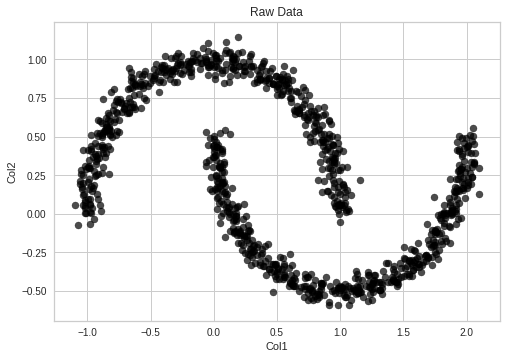

In [3]:
fig, ax = plt.subplots()

# Plot the features
ax.scatter(X['Col1'],
           X['Col2'],
           marker = 'o',
           alpha = 0.7,
           s = 50,
           color = 'black',
           edgecolor = 'black');

# Axis labels.
ax.set_title('Raw Data')
ax.set_xlabel(X.columns[0])
ax.set_ylabel(X.columns[1])

# Use a clustering model to label every row in the dataset

In [4]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

# Produce cluster labels.
def get_cluster_labels(algorithm, cluster_count, X):
    
    # Determine which model to generate.
    if algorithm == 'hac':
        model = AgglomerativeClustering(n_clusters = cluster_count, linkage = 'single')
    if algorithm == 'kmeans':
        model = KMeans(n_clusters = cluster_count, init = 'k-means++', random_state = 42)
    
    model.fit(X)
    cluster_labels = model.fit_predict(X)
    
    # Return the original DataFrame with the labels appended as a new column.
    return cluster_labels

print('Function to produce cluster labels has been defined.')

Function to produce cluster labels has been defined.


# Plot the clusters

In [5]:
def plot_clusters():
    
    fig, ax = plt.subplots()

    # Caption the various clusters.
    colors = cm.nipy_spectral(cluster_labels.astype(float) / 2)

    # Plot the features.
    ax.scatter(X['Col1'],
               X['Col2'],
               marker = 'o',
               alpha = 0.7,
               s = 50,
               color = colors,
               edgecolor = 'black');

    # Axis labels.
    ax.set_title('Clustered Data')
    ax.set_xlabel(X.columns[0])
    ax.set_ylabel(X.columns[1])
    
print('Function to plot the clusters has been defined.')

Function to plot the clusters has been defined.


# Generate a *k*-means clustering model and plot the results

,Col1,Col2,c_label
0,0.201460,0.958164,0
1,0.050975,0.305029,0
2,1.573935,-0.366780,1
3,-0.991440,0.094687,0
4,0.465245,-0.326029,1


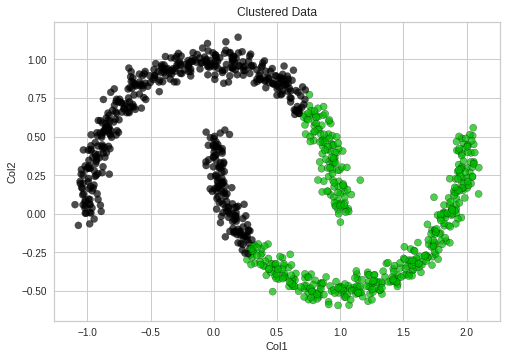

In [6]:
# Generate cluster labels for the moons data, assuming 2 clusters.
cluster_labels = get_cluster_labels('kmeans', 2, X)

# Append the cluster labels to a new column in the original dataset.
labeled_data = X.assign(c_label = cluster_labels)

# Show a preview of rows in the dataset with cluster labels added.
display(labeled_data.head())

plot_clusters()

# Generate a hierarchical agglomerative clustering model and plot the results

,Col1,Col2,c_label
0,0.201460,0.958164,0
1,0.050975,0.305029,1
2,1.573935,-0.366780,1
3,-0.991440,0.094687,0
4,0.465245,-0.326029,1


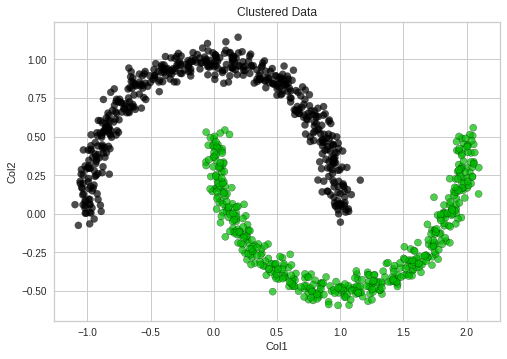

In [7]:
# Generate cluster labels for the moons data, assuming 2 clusters.
cluster_labels = get_cluster_labels('hac', 2, X)

# Append the cluster labels to a new column in the original dataset.
labeled_data = X.assign(c_label = cluster_labels)

# Show a preview of rows in the dataset with cluster labels added.
display(labeled_data.head())

plot_clusters()

# Use the elbow method to determine the optimal number of clusters

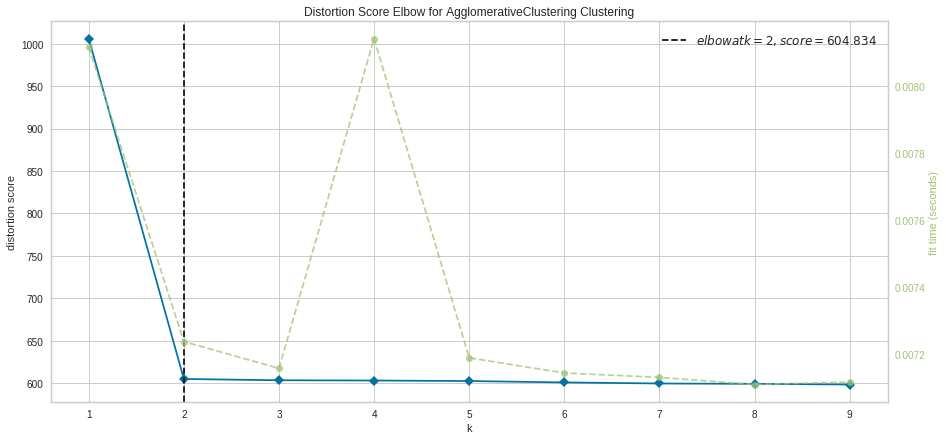

In [8]:
from yellowbrick.cluster import KElbowVisualizer

# Use the elbow method to find the optimal number of clusters.
plt.rcParams["figure.figsize"] = (15, 7)

visualizer = KElbowVisualizer(AgglomerativeClustering(linkage = 'single'), k = (1, 10))
visualizer.fit(X)
visualizer.poof();

# Plot a dendrogram for additional cluster analysis

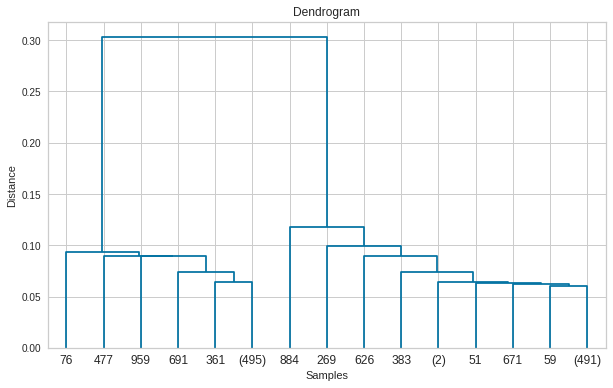

In [9]:
import scipy.cluster.hierarchy as sch

# Specify same linkage used in training model.
linkage = sch.linkage(X, method = 'single')

def plot_dendro(cutoff = 0):
    plt.figure(figsize = (10, 6))  
    plt.title('Dendrogram')
    plt.xlabel('Samples')
    plt.ylabel('Distance')

    # Truncate dendrogram x-axis so it's readable.
    dendrogram = sch.dendrogram(Z = linkage, truncate_mode = 'lastp', p = 15, color_threshold = cutoff)
    
plot_dendro()

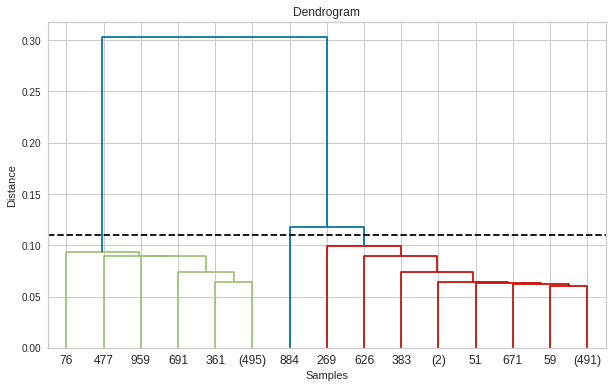

In [10]:
cutoff = .11

plot_dendro(cutoff)

# Plot cutoff line based on specified distance.
plt.axhline(y = cutoff, color= 'black', linestyle = '--')